 # Projet numérique : équations de LOKTA-VOLTERRA

## Importations et configuration générale

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
#plt.ioff() 


## Macros Latex

$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\norme}[1]{\left\Vert #1\right\Vert}$

## Question 1

### Signification des termes

- $t$ est le temps
- $x_1(t)$ : le nombre positif de proies en vie à l'instant $t$
- $x_2(t)$ : le nombre positif de prédateurs en vie à l'instant $t$
- $\dot{x_1}(t)$ : la variation de la population de proies à l'instant $t$
- $\dot{x_2}(t)$ : la variation de la population de prédateurs à l'instant $t$
- $\alpha$ : le taux de reproduction intrinsèque des proies
- $\beta$ : le taux de prédation, c'est-à-dire le taux de mortalité des proies à cause des prédateurs
- $\gamma$ : le taux de reproduction des prédateurs liés à la présence des proies
- $\delta$ : le taux de mortalité intrinsèque des prédateurs

###  Points d'équilibre

On définit :

$\begin{array}{ccccc}
f & : & \mathbb{R}^2 & \to & \mathbb{R}^2 \\
 & & (x_1, x_2) & \mapsto &  
 \begin{pmatrix}
  x_1(\alpha-\beta x_2) \\
  -x_2(\gamma - \delta x_1) \\
\end{pmatrix}
\\
\end{array}$
et
$(E)$ : $(\dot{x_1}, \dot{x_2})=f(x_1, x_2)$

En revenant à la définition, on résout $f(x)=\begin{pmatrix}
  0 \\
  0 \\
\end{pmatrix}$ d'inconnue $x \in \mathbb{R}^2$.

Par disjonction de cas (si $x_1$ est nul ou non), on obtient $\begin{pmatrix}
  0 \\
  0 \\
\end{pmatrix}$
et
$\bar{x}=\begin{pmatrix}
  \frac{\alpha}{\beta} \\
  \frac{\gamma}{\delta} \\
\end{pmatrix}$ qui sont deux solutions distinctes.

### Stabilité

On calcule la matrice jacobienne de $f$, que l'on évalue ensuite en $0$ et en $\overline{x}$ :

$$
J_f(x) =
  \begin{bmatrix}
    \alpha - \beta x_2 & -\beta x_1 \\
    \delta x_2 & -(\gamma-\delta x_1)
  \end{bmatrix}
$$

D'où

$$
J_f(0) = 
\begin{bmatrix}
    \alpha & 0 \\
    0 & -\gamma
  \end{bmatrix}
\textrm{ et }
J_f(\overline{x}) = 
\begin{bmatrix}
    0 & -\beta \frac{\gamma}{\delta} \\
    \delta \frac{\alpha}{\beta} & 0
  \end{bmatrix}
$$

$\alpha > 0$ est valeur propre de $J_f(0)$ donc, par théorème, $0$ est un point d'équilibre instable. Les valeurs propres de $J_f(\overline{x})$ sont $\pm i \sqrt{\alpha\gamma}$, de parties réelles nulles. On ne peut donc rien conclure a priori.


## Question 2

In [13]:
# Choix des paramètres

# (cohérents avec leur signification ?)
#alpha = 1.5
#beta = 0.3
#gamma = 0.1
#delta = 1.2

alpha = 2/3
beta = 4/3
gamma = 1
delta = 1

nb_max = 2 # bonne échelle, cf wikipedia, en milliers
nb_tot = 20

def lk(x1, x2):
    return np.array([x1*(alpha-beta*x2),-x2*(gamma-delta*x1)])

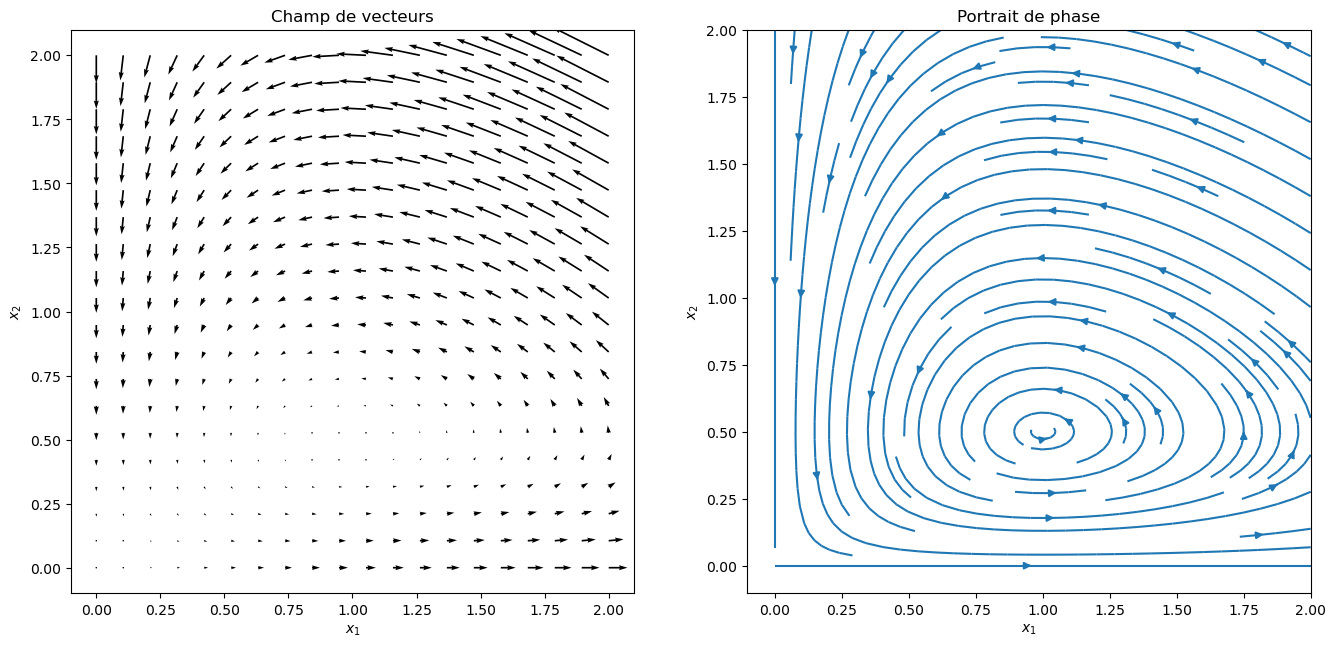

In [14]:
x = np.linspace(0, nb_max, nb_tot)
y = np.linspace(0, nb_max, nb_tot)
X,Y = np.meshgrid(x,y)
fX,fY = lk(X,Y)
ax1 = plt.subplot(1,2,1)
ax1.set_aspect('equal')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_title('Champ de vecteurs')
q = ax1.quiver(X, Y, fX, fY)
ax2 = plt.subplot(1,2,2)
ax2.set_aspect('equal')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title('Portrait de phase')
q2 = ax2.streamplot(X, Y, fX, fY);

Le champ de vecteurs met en évidence le comportement général des solutions du système d'équations différentielles, ainsi que certains points d'équilibre. Le portrait de phase permet de réaliser que les solutions sont périodiques, bornées, à la trajectoire fermée. On retrouve bien un point d'équilibre stable (sur l'exemple en $(1, 0.5)$).

## Question 3

On pose le problème de Cauchy suivant, pour $t_1 \in \R$ et $a \in \R$:
$$
(P)\textrm{ } \begin{cases}
       y\textrm{ vérifie } (E)\\
       y(t_1)=(0,a)
\end{cases}
$$

### Lemme intermédiaire

Posons 
$\begin{array}{ccccc}
y & : & \mathbb{R} & \to & \mathbb{R}^2 \\
 & & t & \mapsto &  
 \begin{pmatrix}
  0 \\
  a \exp (- \gamma (t - t_1)) \\
\end{pmatrix}
\\
\end{array}$

Alors $y$ vérifie $(P)$.

### Réponse à la question

Par l'absurde, supposons qu'il existe une solution $x = (x_1, x_2)$ initialisée en $x(t_0) \in (\R_{>0})^2$ pour laquelle il existe $t_2 \in \R$ tel que, sans perte de généralité, $x_1(t_2) \le 0$.

Puisque $x$ est continue, par le théorème des valeurs intermédiaires, il existe $t_1$ tel que $x_1(t_1)=0$.

D'une part, $x$ vérifie ce problème de Cauchy.

D'autre part, $y$ vérifie ce problème pour $a = x_2(t_1)$.

Par unicité, d'après le théorème de Cauchy-Lipschitz, $x_1 = 0$, puis $x_1(t_0) = 0$, ce qui est absurde.

Ainsi, toute solution initialisée dans $(\R_{>0})^2$ reste dans $(\R_{>0})^2$ sur son ensemble de définition.


## Question 4



Soit $x$ vérifiant $(E)$ initialisée dans $(\R_{>0})^2$. On pose $h=H(x)$.

$f$ est continue, donc d'après le théorème de Peano-Arzelà, on peut définir $x$ sur un intervalle $I$ d'intérieur non vide.

On calcule :

$$h'=\delta \dot{x_1} - \gamma \frac{\dot{x_1}}{x_1} + \beta \dot{x_2} - \alpha \frac {\dot{x_2}}{x_2} = 0 \textrm{ car } x \textrm{ vérifie } (E)$$

Donc $h = H_0 \in \R$ sur $I$.

Soit $x$ une solution maximale initialisée dans $(\R_{>0})^2$.

D'après le théorème du domaine maximal d'existence, $x$ est définie sur $]t_-, t^+[$ avec $(t_-, t^+) \in \overline{\R}^2$. Montrons que $t_- = -\infty$ et $t^+ = +\infty$.

Par l'absurde, sans perte de généralité, si $t_-$ est fini, alors :

### Cas 1

Si $x \rightarrow +\infty$, alors $h \rightarrow +\infty$, ce qui est absurde.

### Cas 2

On pose $X = (\R_{>0})^2$. D'après la question 3, on sait que $x$ reste dans $X$ et $\partial X = (\R \times \{+\infty\}) \cup (\R \times \{+0\}) \cup ( \{+\infty\} \times \R) \cup ( \{0\} \times \R)$.

Si $(t,x) \rightarrow (t_-, x_f)$ où $x_f \in \partial X$, alors $h \rightarrow \pm \infty$, ce qui est absurde.

Ainsi, toute solution maximale initialisée dans $X$ est définie sur $\R$.





## Question 5

In [9]:
def h(x1,x2):
    return delta*x1-gamma*np.log(x1)+beta*x2-alpha*np.log(x2)

In [10]:
def display_contour(f, x, y, levels): # cf projet numérique 1
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.title('Courbes de niveau de $H$')
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

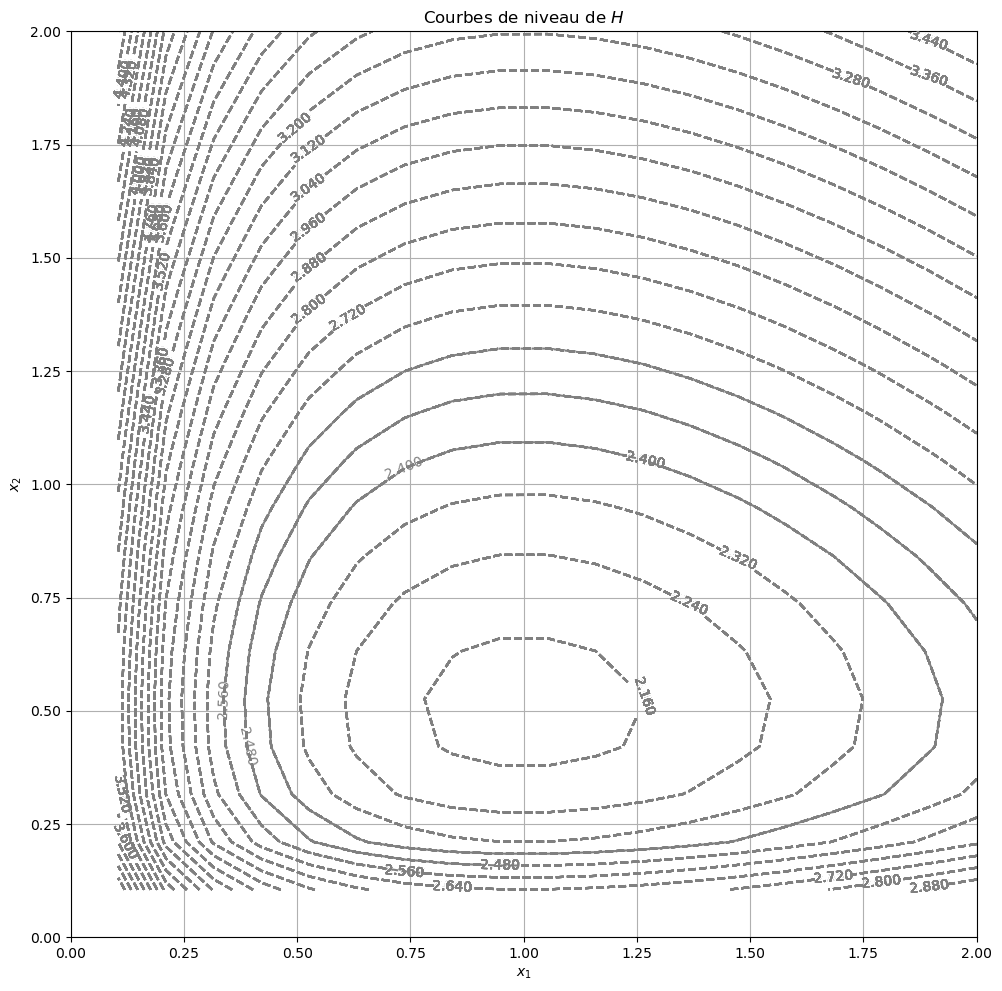

In [15]:
display_contour(h, X, Y, 30);

$\overline{x}$ semble au centre des lignes de niveau, en tant que minimum de la fonction $H$. Les courbes de niveau de $H$ ressemblent beaucoup au portrait de phase de la question 2. Les solutions suivent les lignes de niveau d'après la question 4. Elles sont bien périodiques et bornées.

Soit $\varepsilon > 0$. Montrons graphiquement qu'il existe $\eta > 0$ tel que pour tout $x_0$ vérifiant $|x_0 - \overline{x}| \le \eta$, la solution maximale $x$ passant par $x_0$ est définie sur $\R_{\ge 0}$ et vérifie $|x(t) - \overline{x}(t)| \le \varepsilon$.

- on dessine le cercle de rayon $\varepsilon$
- on constate que ce cercle contient entièrement un certain nombre de lignes de niveau, d'après le graphique précédent
- on prend pour $\eta$ la borne sup des distances de $\overline{x}$ aux lignes de niveau
- on vérifie ainsi la propriété énoncée

Par conséquent, $\overline{x}$ est stable.

## Question 6

In [53]:
def liste_temps(t0, dt, tf):
    t = [t0]

    while t[-1] < tf:
        t_new = t[-1] + dt
        if (t_new < tf):
            t.append(t_new)
        else:
            t.append(tf)

    return t

def solve_euler_explicit(f, x0, dt, t0, tf): # si pas multiple, s'arrête avant tf ? temps final exclut ?? pour l'instant oui
    #t = [t0+n*dt for n in np.arange(0,(tf-t0)//dt+1)]
    t = liste_temps(t0, dt, tf)
    
    x = [x0]
    for tps in t[:-1]:
        x.append(x[-1] + dt*f(tps, x[-1]))
    return t, x

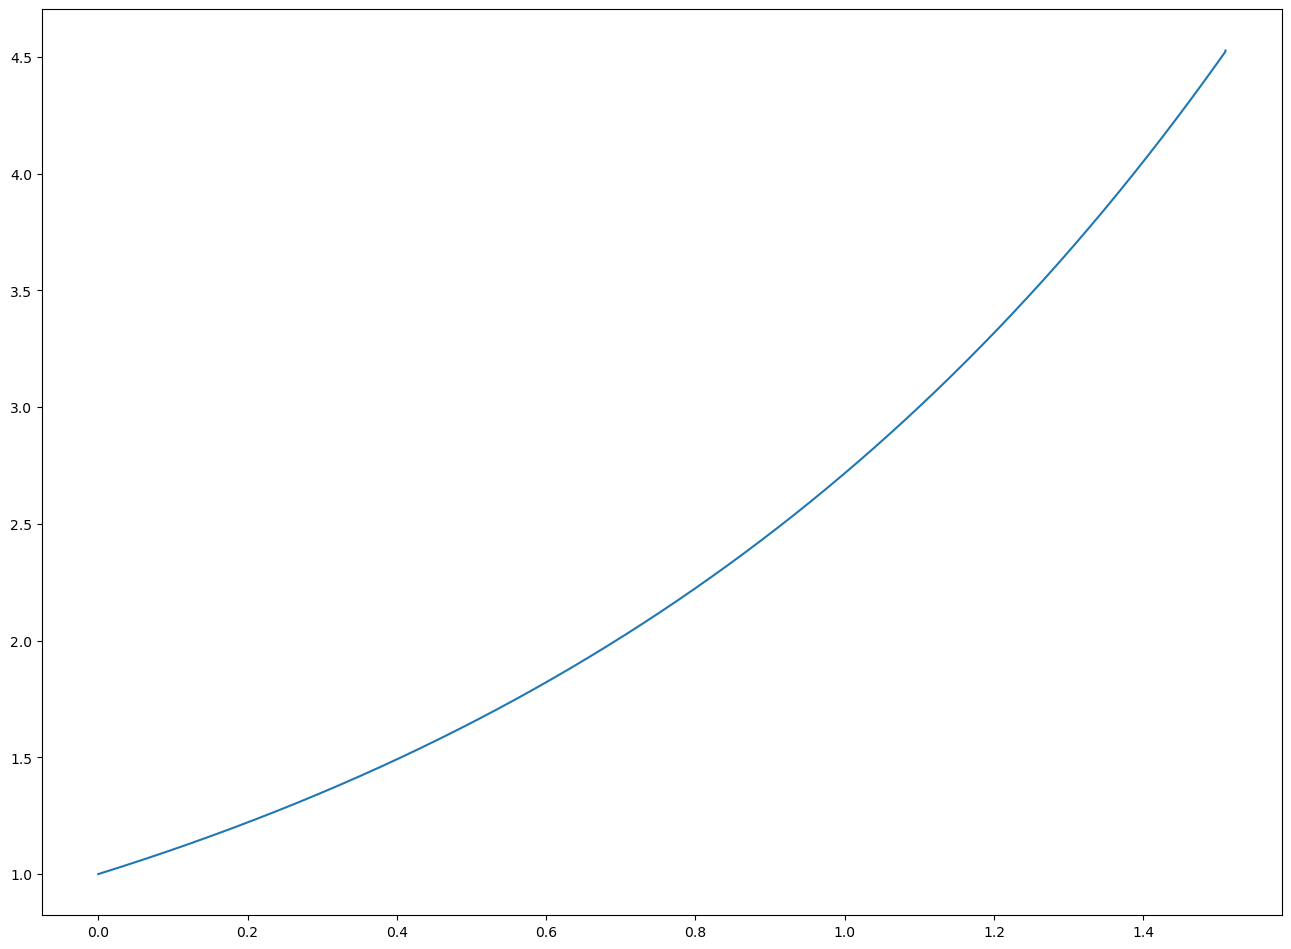

In [26]:
def f_exp(t, x):
    return x

t, x = solve_euler_explicit(f_exp, 1, 0.001, 0, 1.51) #x0 = 0 ne fonctionne pas ?
#0.1  : idée
#0.01 : plus proche : vérifier convergence comment ?
#0.001  plus correct MS diverge toujours
# après : erreur ne diminue plus ?, voire même augmente ???
#ne converge pas vraiment ?

#print(np.exp(0))
#print(x[0])
#print(np.exp(5))
#print(x[-1])
plt.plot(t, x);

## Ordre de convergence

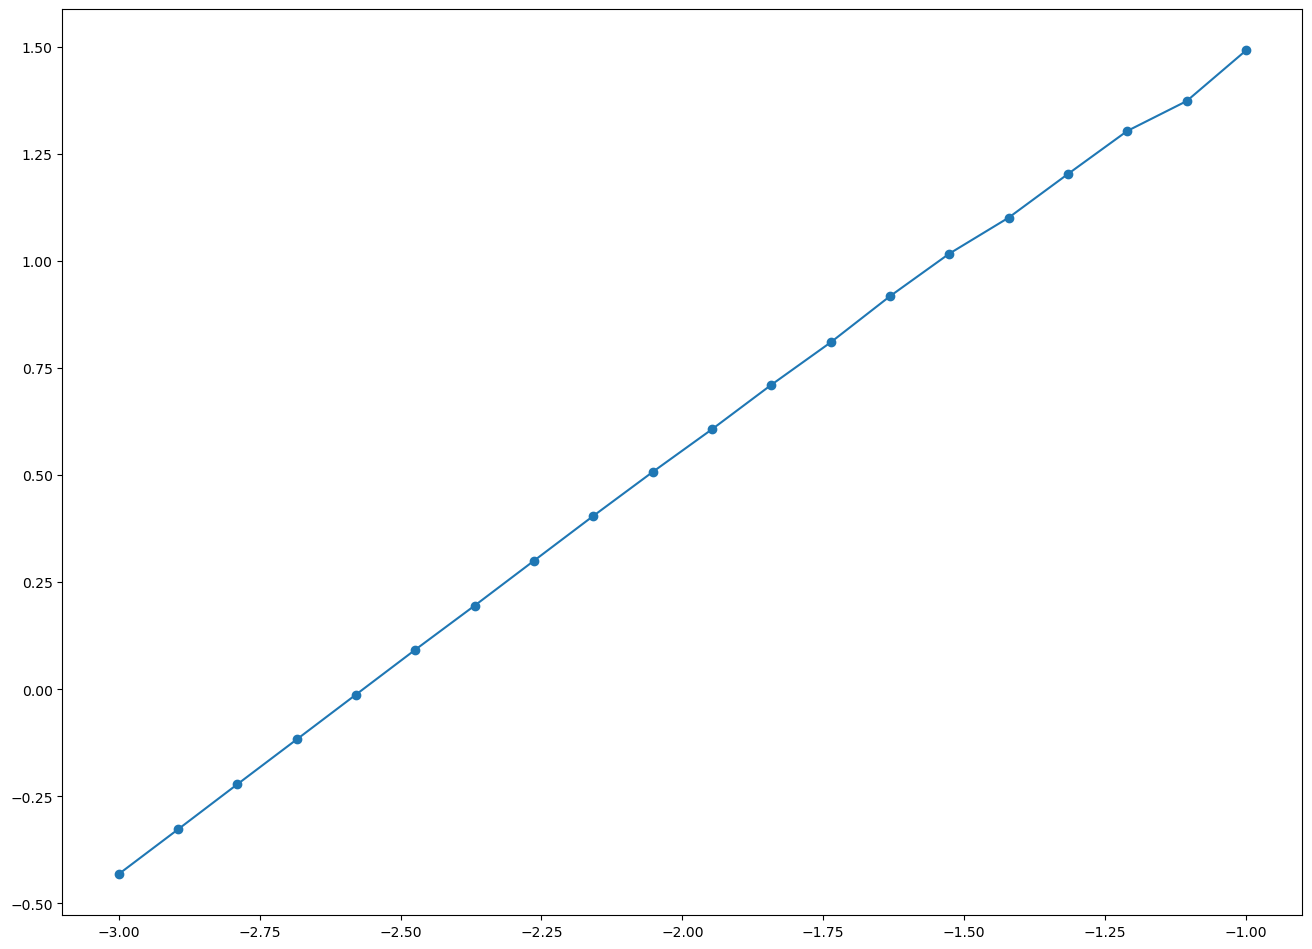

In [48]:
p = np.logspace(-3,-1,20, base=10)
d = []
e = np.exp(5)

for ptmp in p:
    t, x = solve_euler_explicit(f_exp, 1, ptmp, 0, 5)

    md = np.abs(e-x[-1])
    for i in range(len(t)):
        diff = np.abs(np.exp(t[i]) - x[i])
        if diff > md:
            md = diff

    d.append(md) # max sur l'intervalle de temps

plt.plot(np.log10(p), np.log10(d), '-o'); # doit obtenir droite




Le schéma converge bien lorsque $dt \rightarrow 0$.

On obtient bien l'allure d'une droite, ce qui confirme l'ordre de convergence de 1 pour le schéma d'Euler explicite. Nous n'avons pas utilisé des pas trop petits pour ne pas avoir des erreurs d'arrondi, ni des pas trop grands qui ne sont pas valables pour les développements limités lors de la méthode.

## Question 7

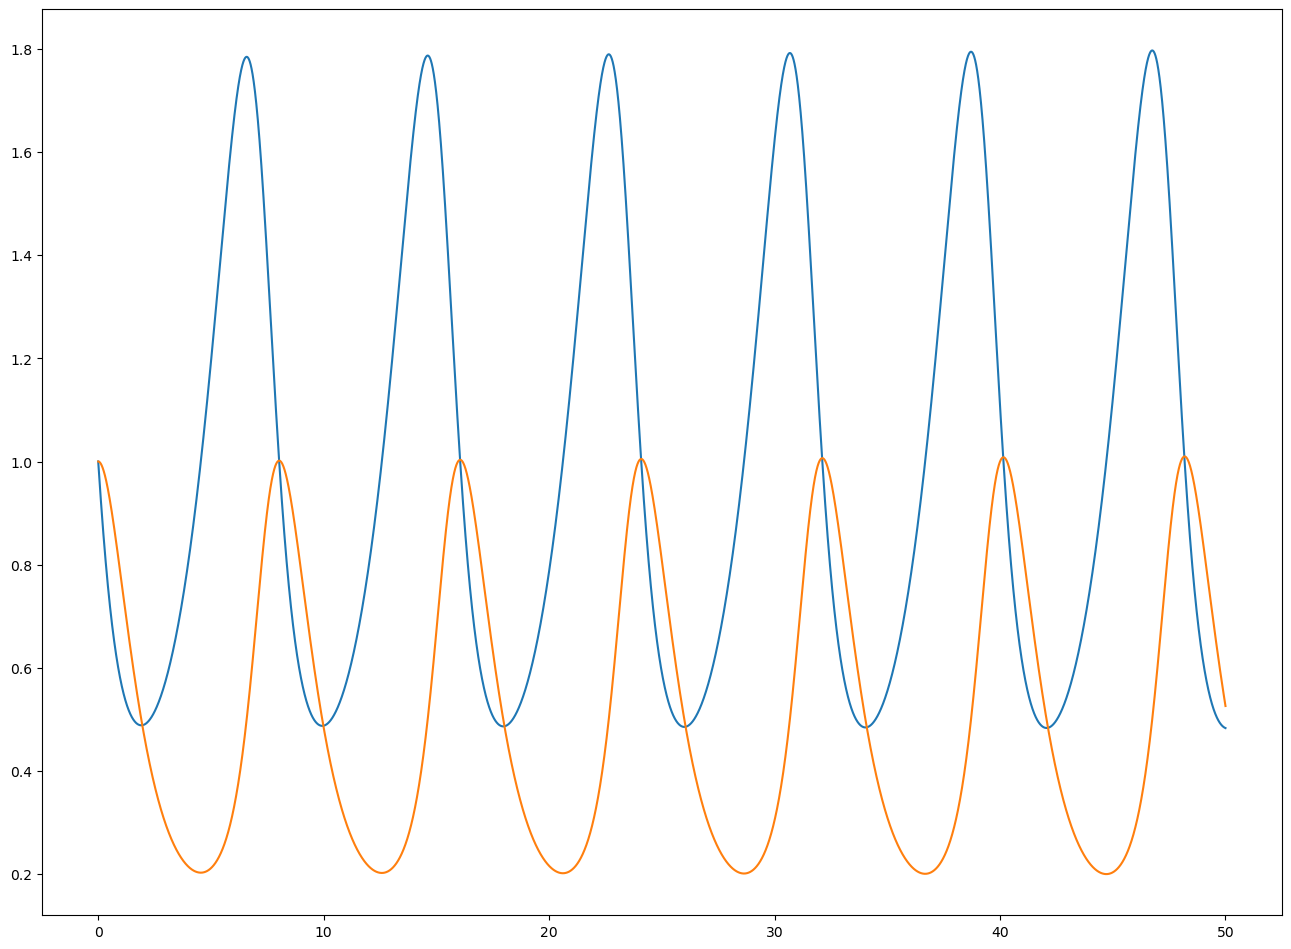

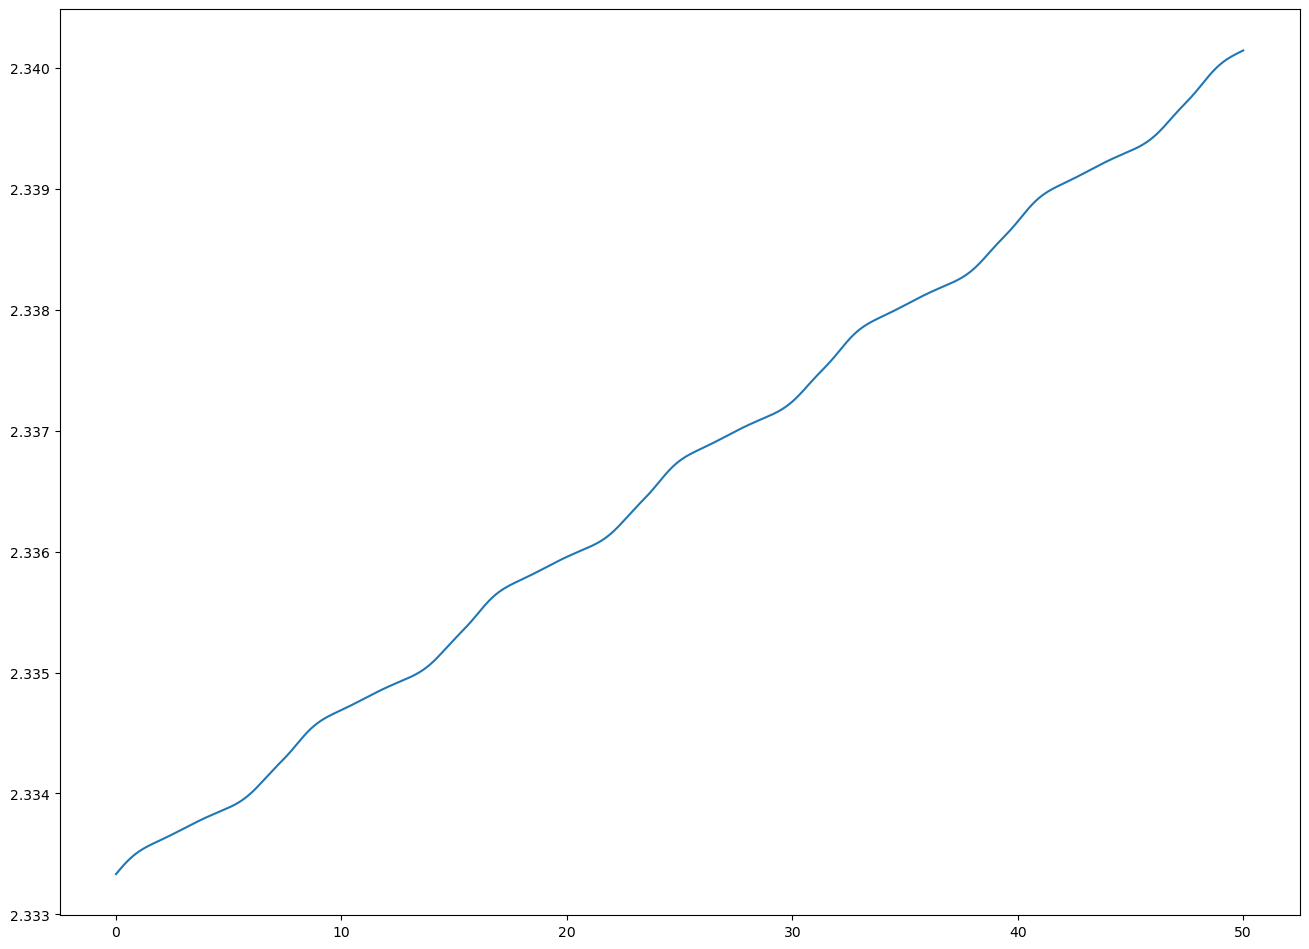

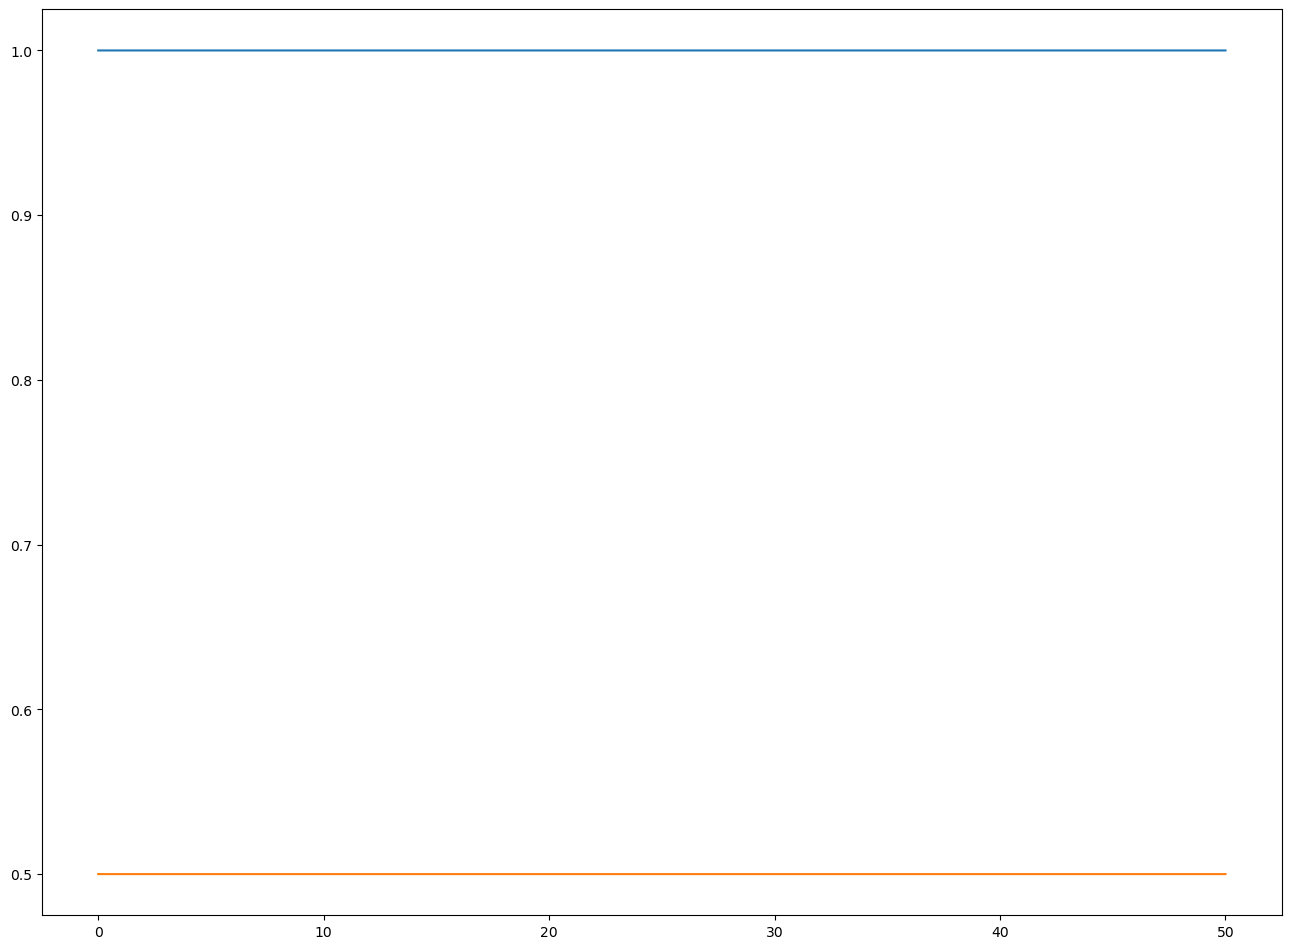

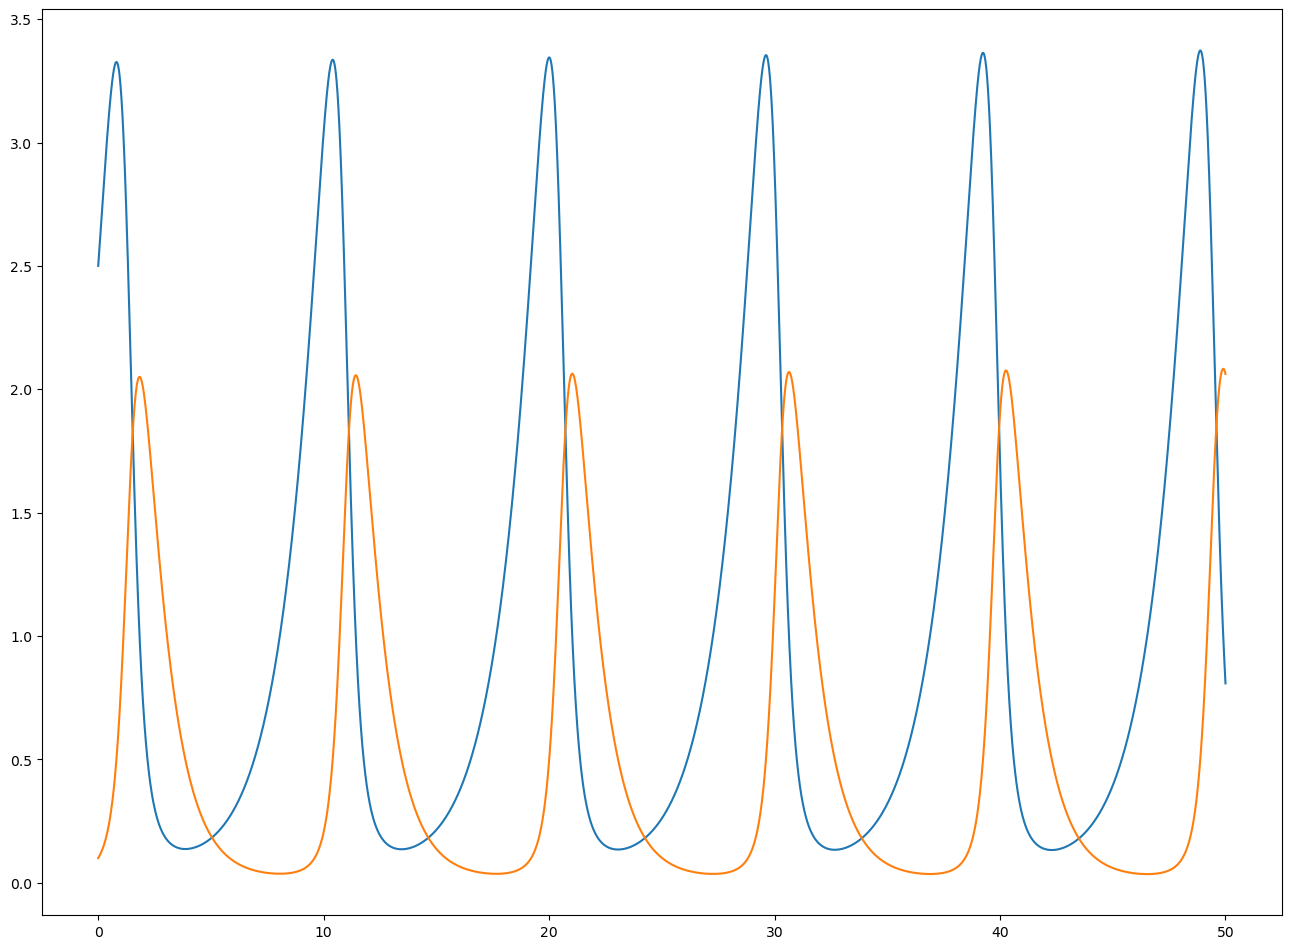

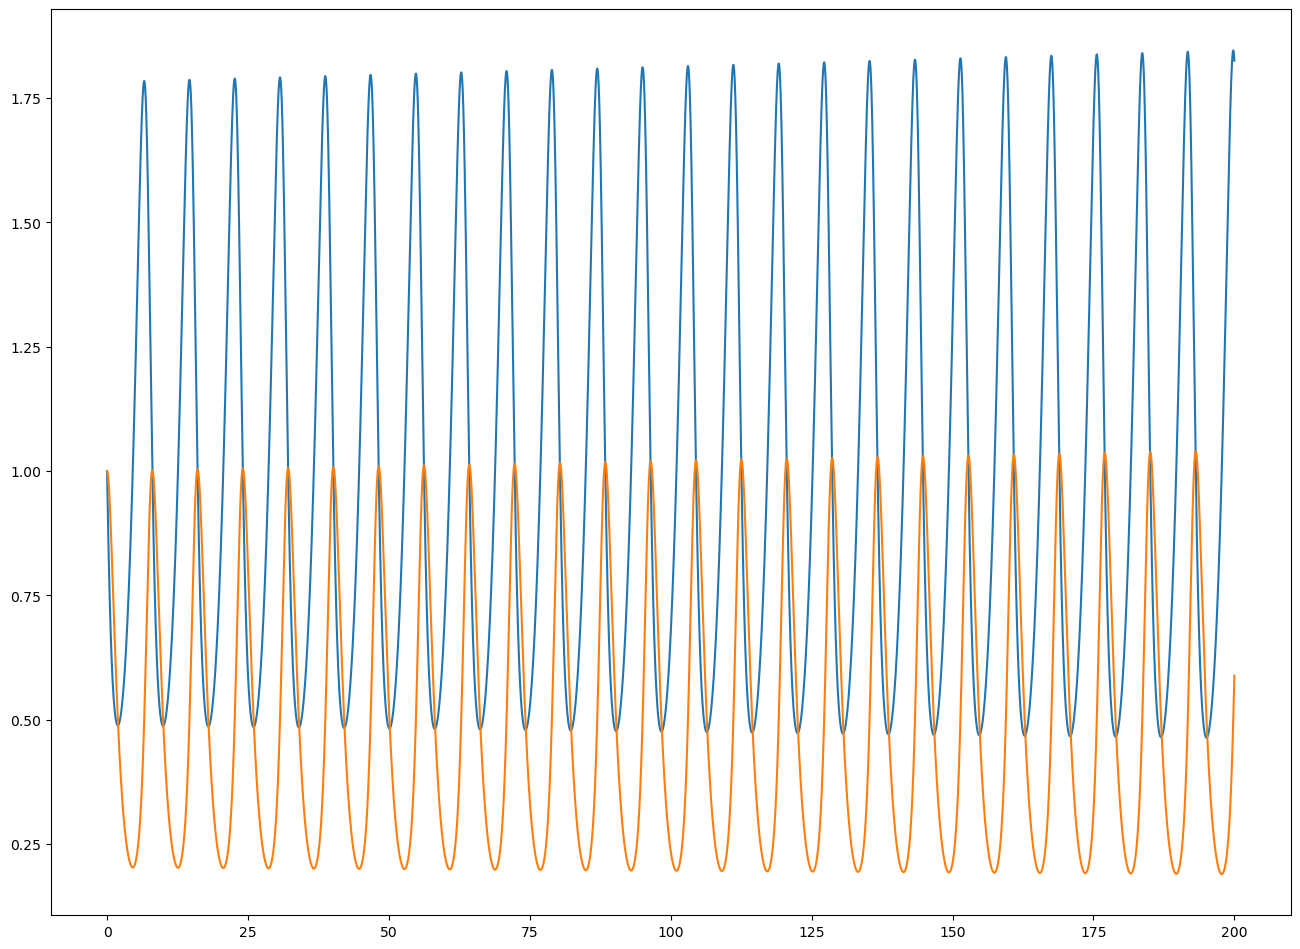

In [51]:
## va diverger en temps long ?

flk = (lambda tps, xt : lk(xt[0], xt[1]))

t, x = solve_euler_explicit(flk, [1.0,1.0], 0.001, 0.0, 50)
plt.plot(t, x);

plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante

plt.figure()
t, x = solve_euler_explicit(flk, [1.0,0.5], 0.001, 0.0, 50) # point fixe
plt.plot(t, x);

plt.figure()
t, x = solve_euler_explicit(flk, [2.5,0.1], 0.001, 0.0, 50) # autre point
plt.plot(t, x);

plt.figure()
t, x = solve_euler_explicit(flk, [1.0,1.0], 0.001, 0.0, 200)
plt.plot(t, x);

En temps long, la solution ne semble pas périodique. Non, cela est en contradiction avec les questions 2 et 4. L'évolution de $H$ montre que $h$ n'est pas constant, ce qui signifie que l'invariant du système n'est pas respecté et conduit à la non-périodicité des solutions.

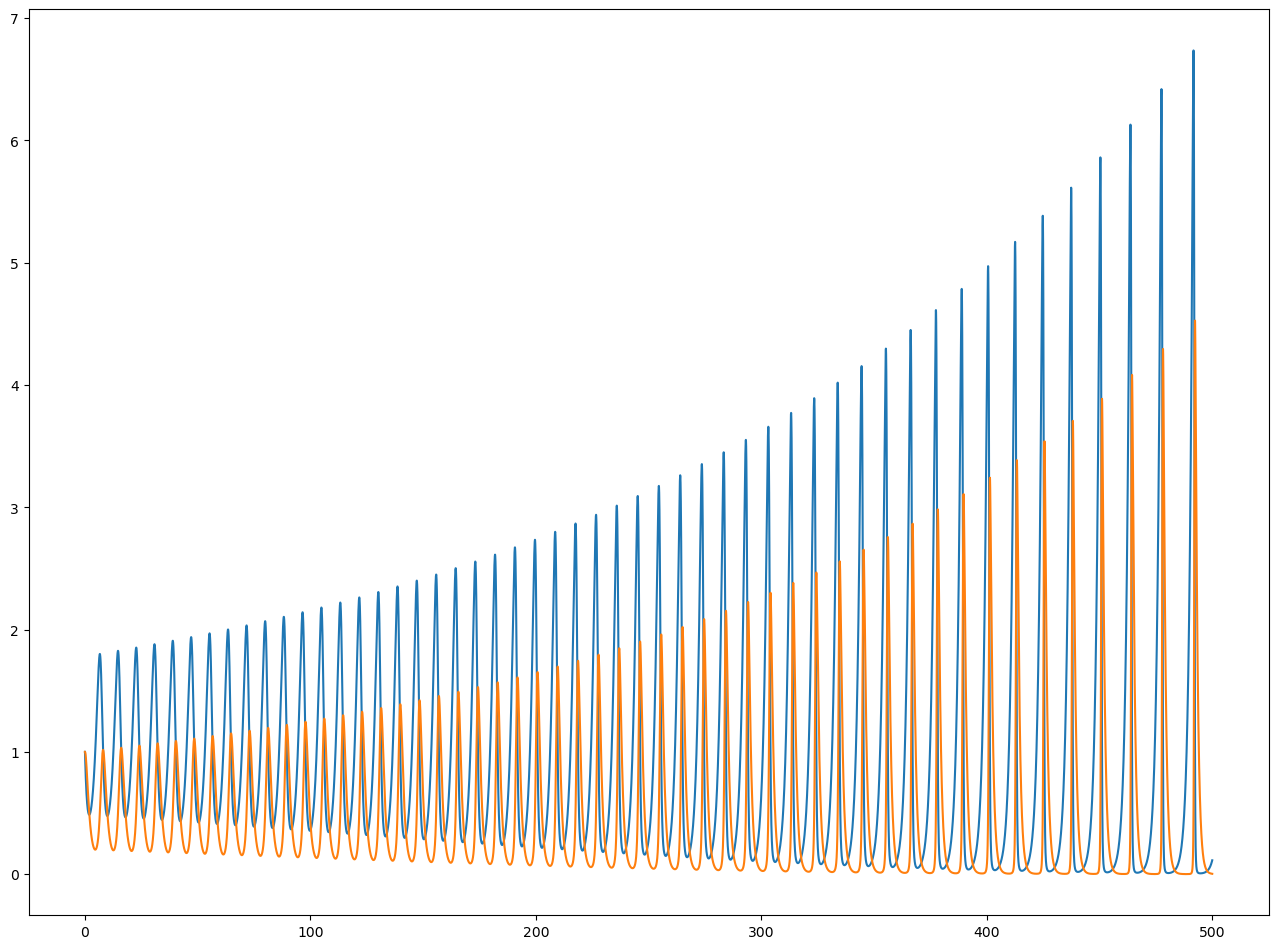

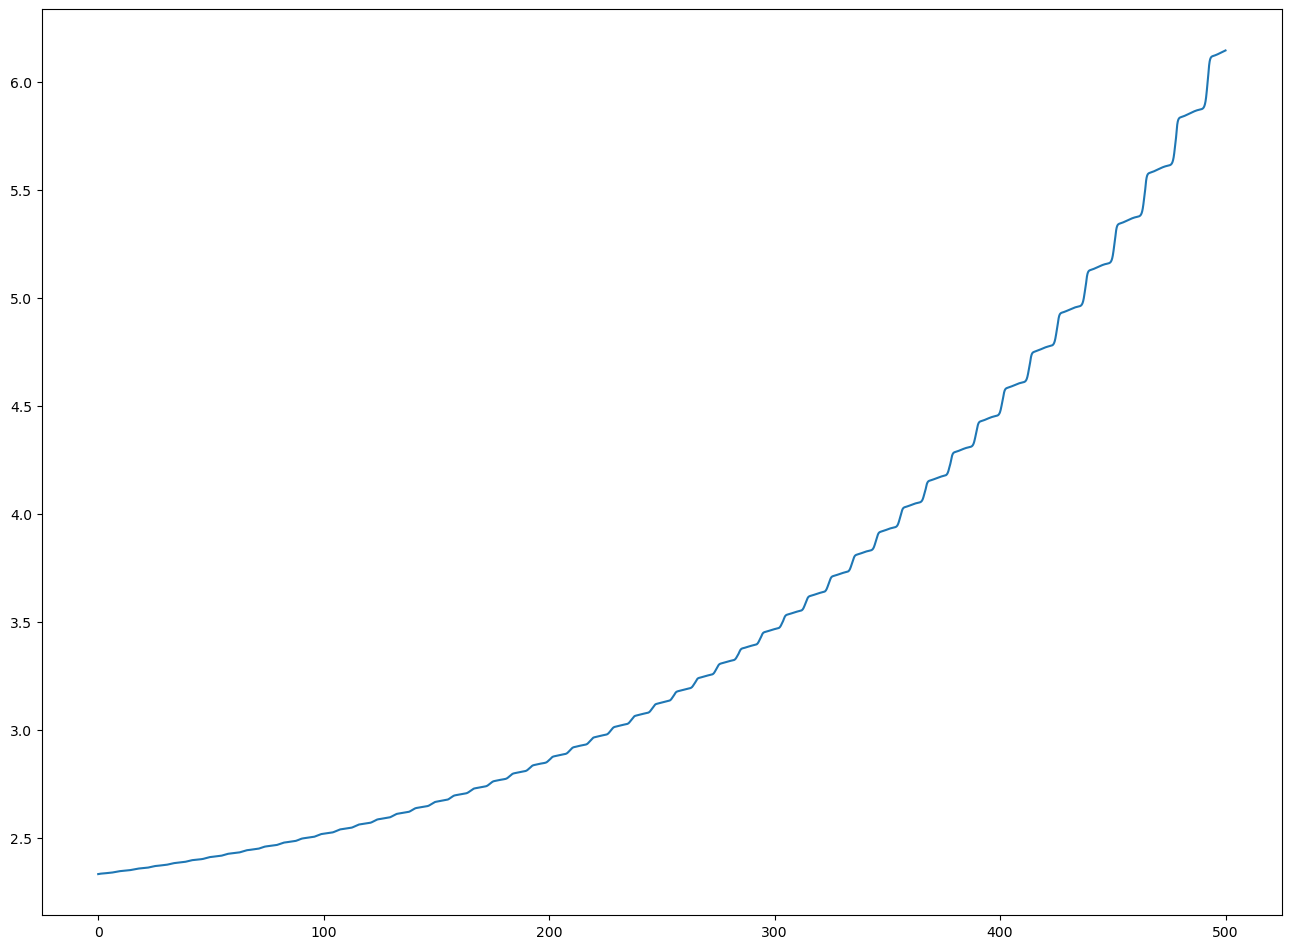

In [12]:
# Temps long

t, x = solve_euler_explicit((lambda tps, xt : lk(xt[0], xt[1])), [1.0,1.0], 0.01, 0.0, 500) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante
# semble non borné, diverger : contradictoire

## Question 8

In [56]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    t = liste_temps(t0, dt, tf)
    x = [x0]
    for i,tps in enumerate(t[:-1]):
        x_exp = (x[-1] + dt*f(tps, x[-1]))
        for _ in range(itermax):
            x_exp = x[-1] + dt*f(t[i+1], x_exp)
        x.append(x_exp)
    return t, x

# p 8 implicite ?
#seuil utilisateur ou iter_max

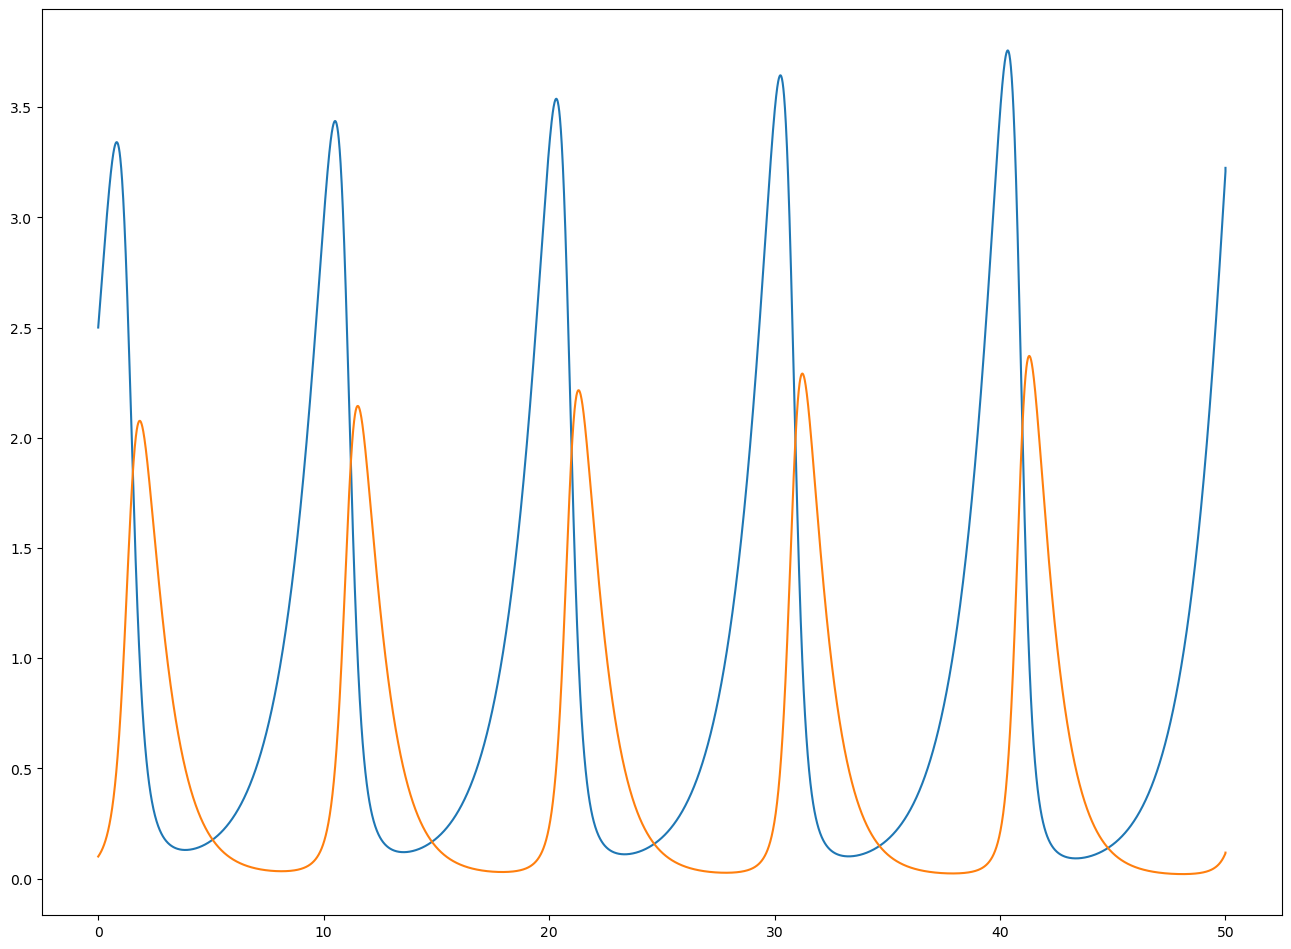

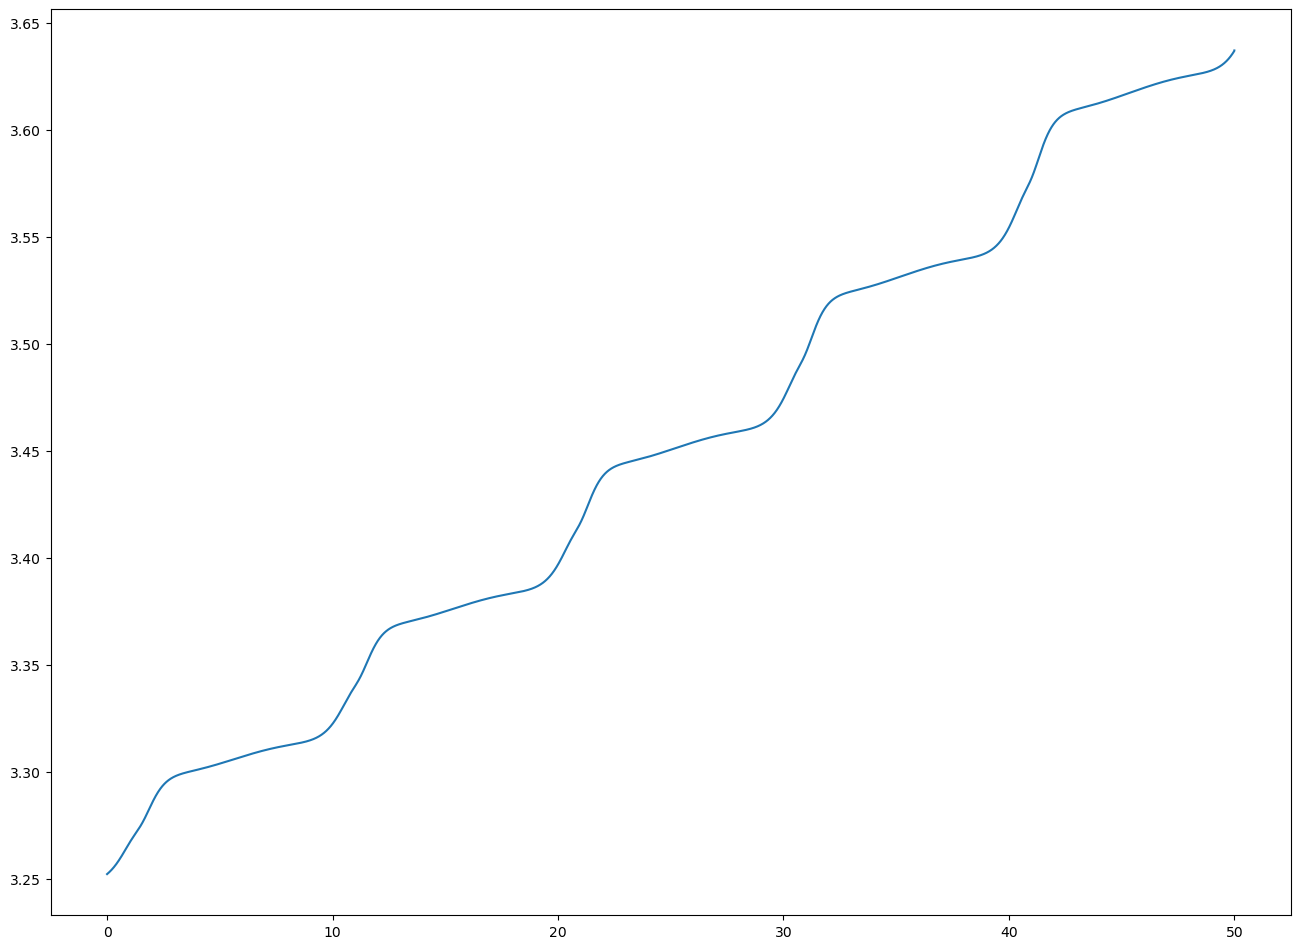

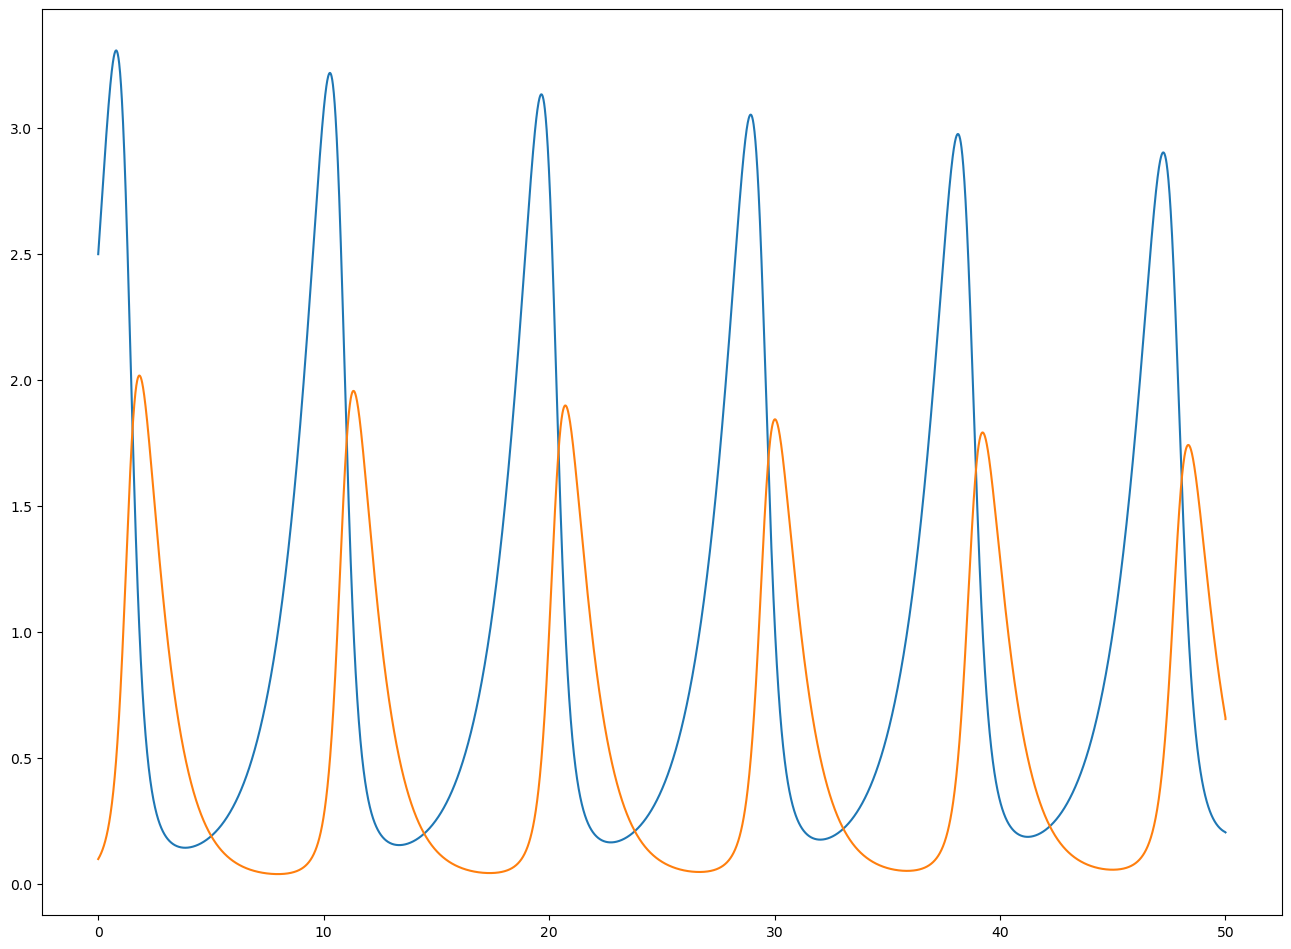

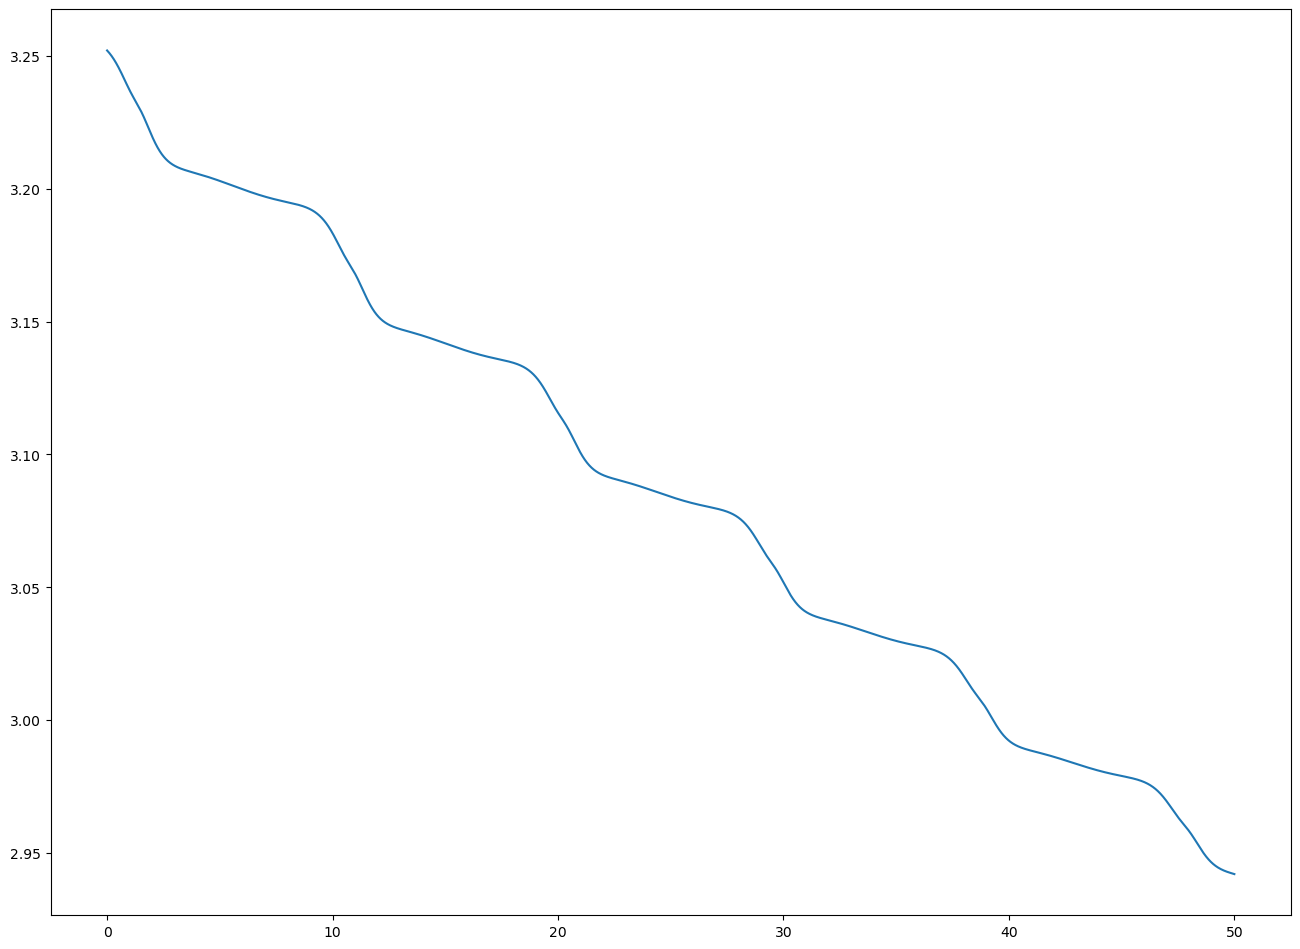

In [57]:
t, x = solve_euler_explicit((lambda tps, xt : lk(xt[0], xt[1])), [2.5,0.1], 0.01, 0.0, 50) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1]));

plt.figure()
t, x = solve_euler_implicit((lambda tps, xt : lk(xt[0], xt[1])), [2.5,0.1], 0.01, 0.0, 50, 10) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante

On constate que $H$ diminue, mais n'est toujours pas conservé : ce n'est une méthode satisfaisante.

In [15]:
def lk2(u, h, h0):
    def f(x1, x2):
        u1, u2 = u(x1, x2)
        hc = h(x1, x2)
        return np.array([x1*(alpha-beta*x2)-u1*(hc-h0),-x2*(gamma-delta*x1)-u2*(hc-h0)])
    return f

def point_eq():
    return gamma/delta,alpha/beta

In [60]:
def solve_euler_symplectic(f, x0, dt, t0, tf, itermax = 100):
    t = [t0+n*dt for n in np.arange(0,(tf-t0)//dt+1)]
    x = [x0]
    for i,tps in enumerate(t[:-1]):
        un, vn = x[-1]
        un1 = un/(1-dt*(1-vn))
        vn1 = vn+ dt*(un1-1)
        x.append([un1, vn1])
    return t, x

## Question 9

On pose :
$$
\forall u = (u_1, u_2) \textrm{ continûment différentiable, } (E_u)\textrm{ : } \begin{cases}
        \dot{x}_1 &= x_1(\alpha -\beta x_2) - u_1(x_1,x_2) (H(x_1,x_2)-H_0) \\
 \dot{x}_2 &= -x_2(\gamma - \delta x_1) - u_2(x_1,x_2) (H(x_1,x_2)-H_0) 
\end{cases}
$$
et $(E')$ : pour tout $u$ continûment différentiable, $x$ vérifie $(E_u)$.

Soit $x$ une solution de $(E)$. Alors, d'après la question 4, $\forall (x_1, x_2)$, $H(x_1, x_2) = H(x(0))$. Donc pour tout $u$ continûment différentiable, $(E_u) = (E)$ donc $x$ est solution de $(E')$.

Soit $x$ une solution de $(E')$. Alors $x$ est solution de $(E_0) = (E)$, donc $x$ est solution de $(E)$.

Par double inclusion, on en déduit que les solutions sont identiques.


## Question 10

Soit $x = (x_1, x_2)$ une solution de $(E')$. Posons $g=(H-H_0)(x)$. On considère la solution $x$ initialisée dans $(\R_{>0})^2$.

On calcule, avec la règle de la différentiation en chaine :
$$
\begin{align*}
\nabla H(x_1, x_2) &= \begin{bmatrix}
           \delta - \frac{\gamma}{x_1}\\
           \beta - \frac{\alpha}{x_2}
         \end{bmatrix}\\

\textrm{ d'où } g' &= \nabla H (x) \cdot \begin{bmatrix}
                                            \dot{x_1}\\
                                            \dot{x_2}
                                \end{bmatrix}\\
                  &= -(H-H_0)\left[\nabla H(x) \cdot u\right] \textrm{ d'après la question 4 car } x \textrm{ vérifie } (E) \textrm{ (vu à la question 9)}
\end{align*}
$$

Soit $k \in \R$. On pose $u = k \nabla H(x)$ pour avoir $g'=-k \norme{\nabla H(x)}^2(H(x)-H_0)$. $u$ est bien définie car $x_1 > 0$ et $x_2 > 0$ d'après la question 3.

Supposons que $\forall t \in \R$, $d(x(t), \overline{x}) > 0$. Alors $\forall t \in \R$, $x(t) \neq \overline{x}$.

Montrons que $g$ converge exponentiellement vers $H_0$ lorsque $t \rightarrow +\infty$. Soit $t_0 \in \R$ (les solutions sont définies sur $\R$ d'après la question 4).

Tout d'abord, posons $v = \norme{\nabla H(x)}^2$ et $\Delta H = H(x) - H_0$.

D'après la question 5, $x$ est bornée (sinon $H$ n'est pas constante). Par continuité de $x$, $x(\R)$ est inclus un segment. La fonction $\norme{\nabla H}^2$ étant continue sur un segment, elle est bornée d'après le théorème des bornes atteintes.

Donc il existe $(a,b) \in \R^2$ tels que $a \le v \le b$.

Par l'absurde, s'il existe $t \in \R$, $(\Delta H)(t)= 0$, alors dérivée nulle, donc minimum (q5), donc x=xbar
 
Supposons, sans perte de généralité, que $\Delta H > 0$. Alors $-k a \Delta H \ge \dfrac{d (\Delta H)}{dt} \ge -k b \Delta H$.

On intègre à la physicienne, après séparation des variables, par croissance de l'intégrale, avec $t_0=0$ : 
$\exp (-kat) \ge \dfrac{(\Delta H)(t)}{(\Delta H)(0)} \ge \exp (-kbt)$

Ainsi, lorsque $t \rightarrow +\infty$, $(\Delta H)(t) \rightarrow 0$ de manière exponentielle.



In [61]:
#x0 = [2.5,0.1]
x0=[1.5,1.5]
k=1#>= 4, 5, 10 ne fonctionne pas ; 1/50 foncitonne
#k=1/50 # entier ?
u = lambda z1, z2 : [-k*(delta-gamma/z2*z1),-k*(beta-alpha/z1*z2)]


t, x = solve_euler_implicit((lambda tps, xt : lk(xt[0], xt[1])), x0, 0.01, 0.0, 50, 10) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante

#faire un portrait de phase de la solution ? n'est pas amorti ? choix de k ?
#euler explicite pouis symplectique ... 
#attention x à une distance positive de x? sens ?


plt.figure()
t, x = solve_euler_symplectic((lambda tps, xt : lk(xt[0], xt[1])), x0, 0.01, 0.0, 50, 10) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante


plt.figure()
t, x = solve_euler_implicit((lambda tps, xt : lk2(u,     h,     h(*x0))(xt[0], xt[1])),     x0, 0.01, 0.0, 50, 10) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1]), label=f"{point_eq()}"); #h pas du tout constante
plt.legend()

plt.figure()
t, x = solve_euler_explicit((lambda tps, xt : lk2(u,     h,     h(*x0))(xt[0], xt[1])),     x0, 0.01, 0.0, 50) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante



NameError: name 'lk2' is not defined

## Question 11

On utilise le système précédemment introduit. H va tendre vers H0, la stabilité sera assurer.

k : vitesse de convergence exponentielle ? correction trop forte par rapport au pas de temps, vitesse pour faire converger

Non, cf plus haut

Méthode d'EUler

Si trop grand : problème ?
Calcul à faire  : indication:



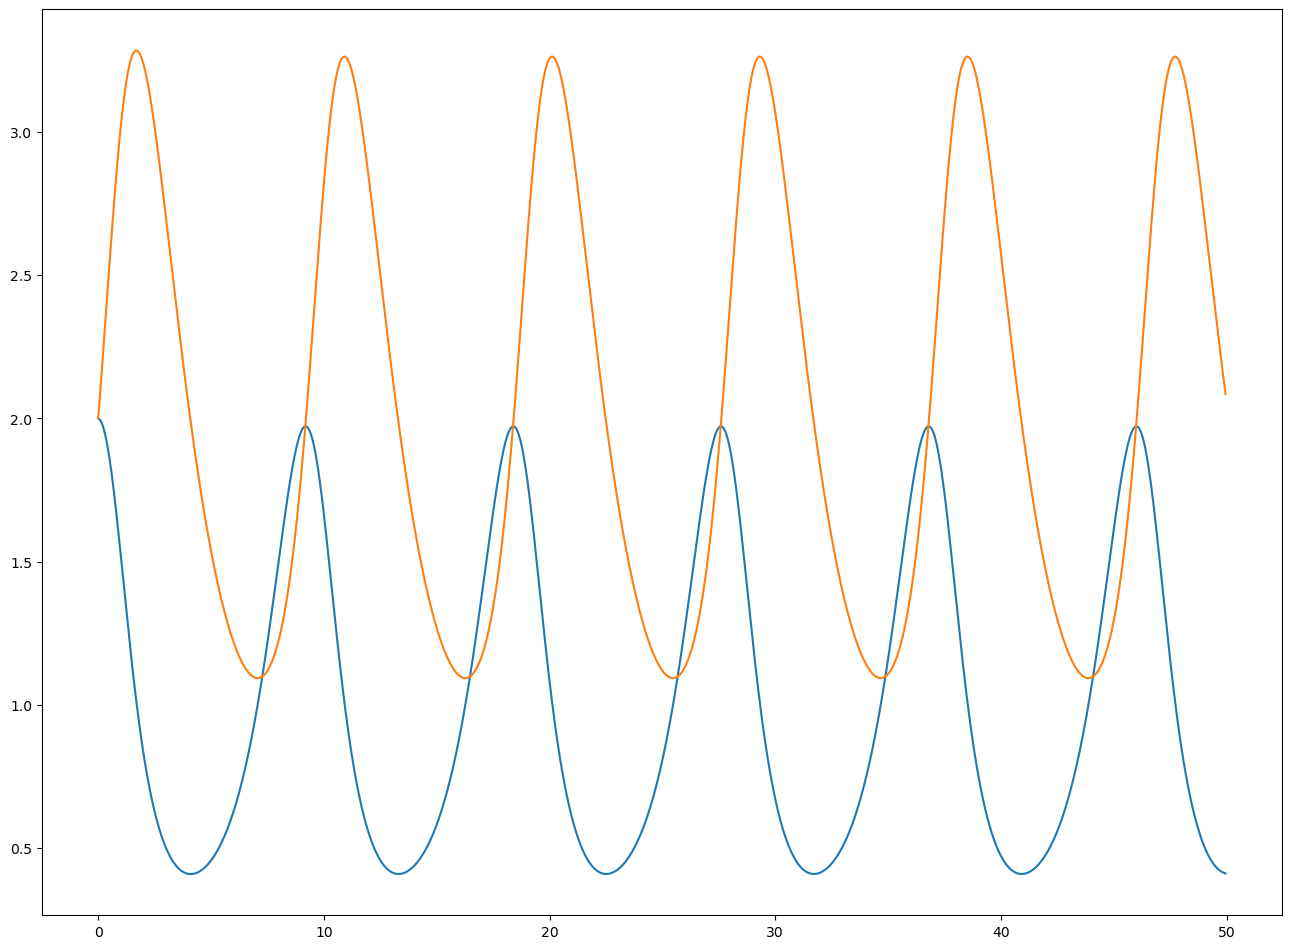

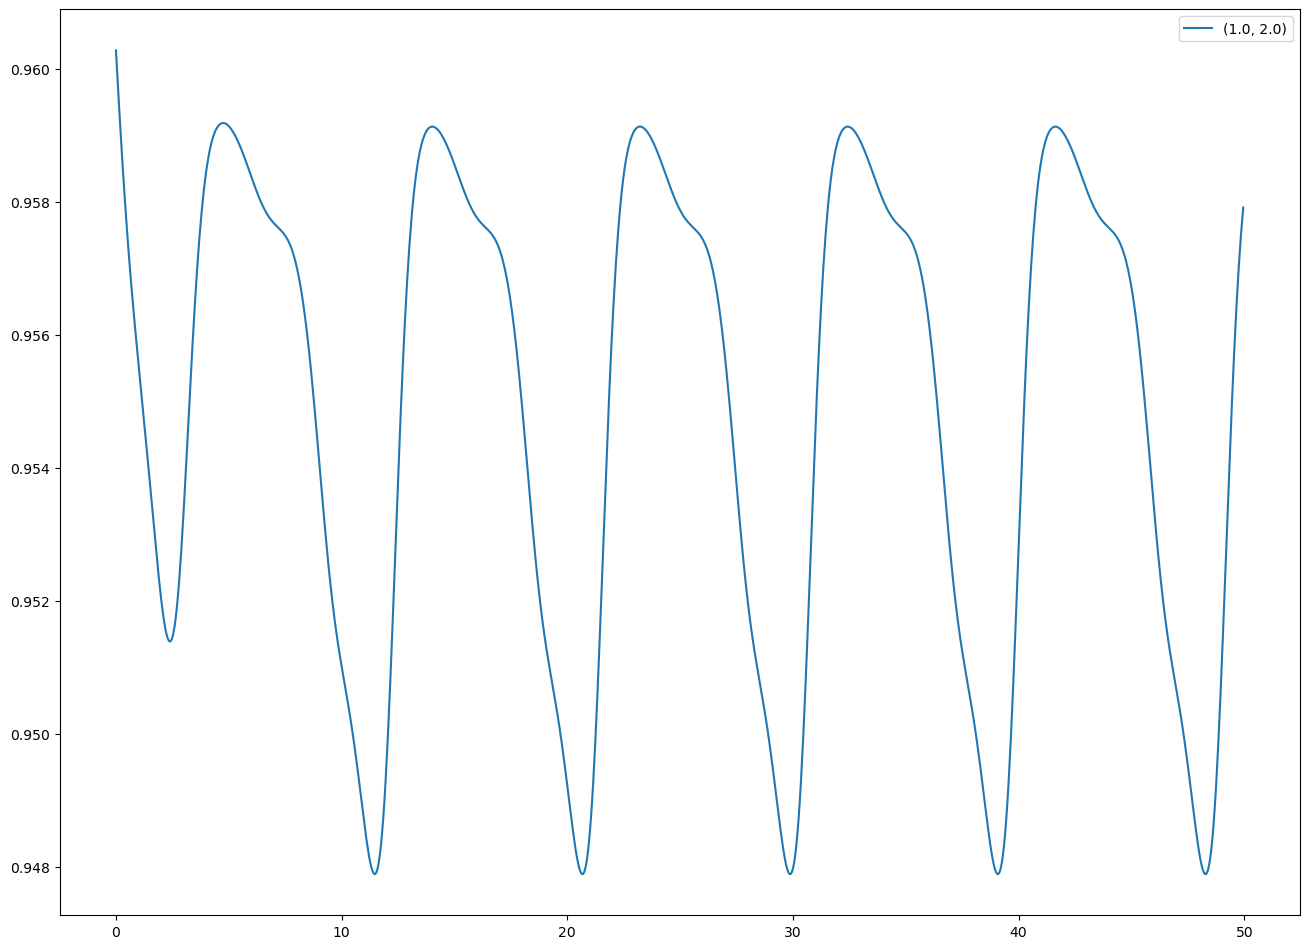

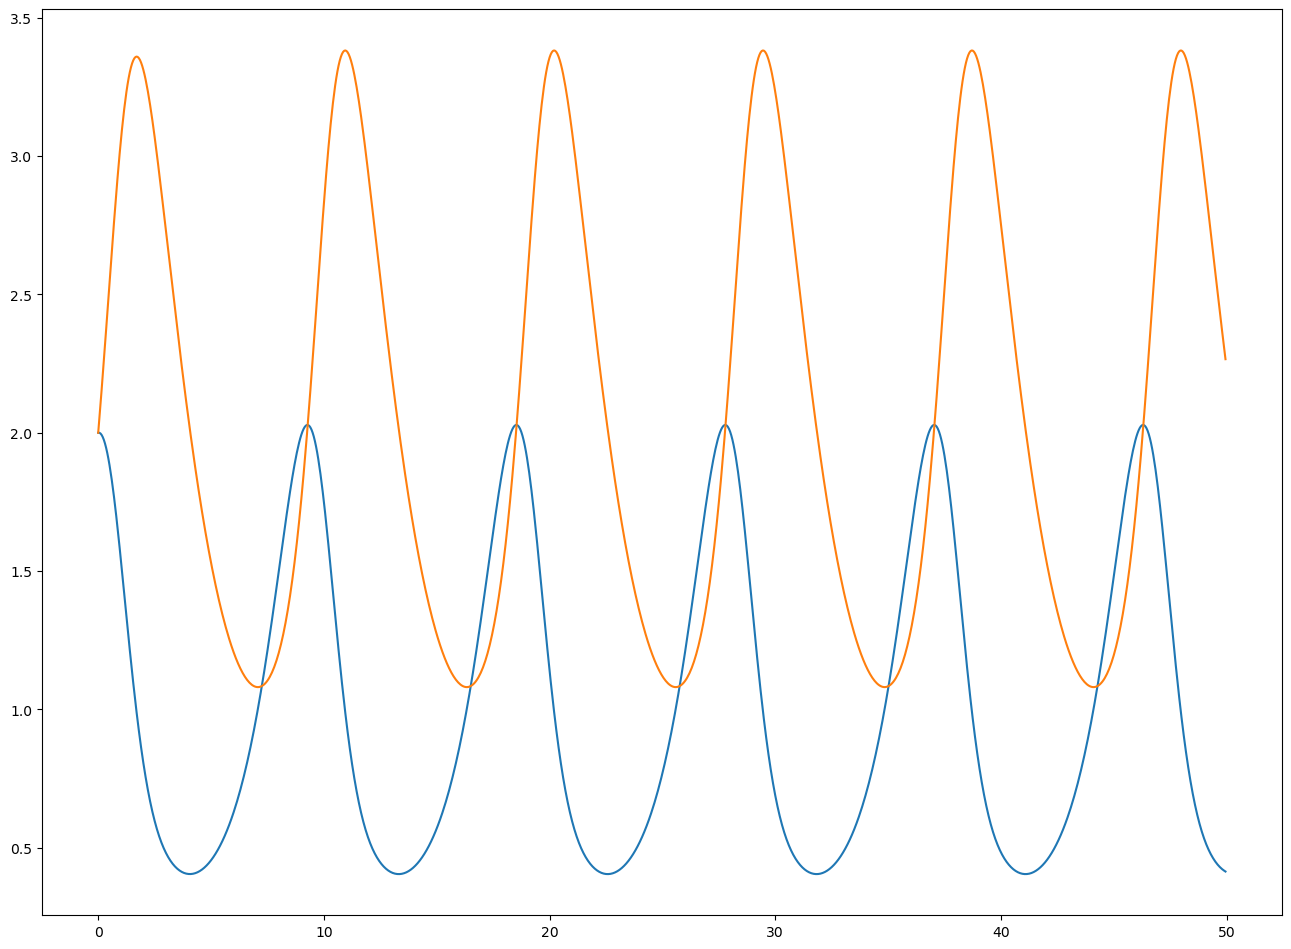

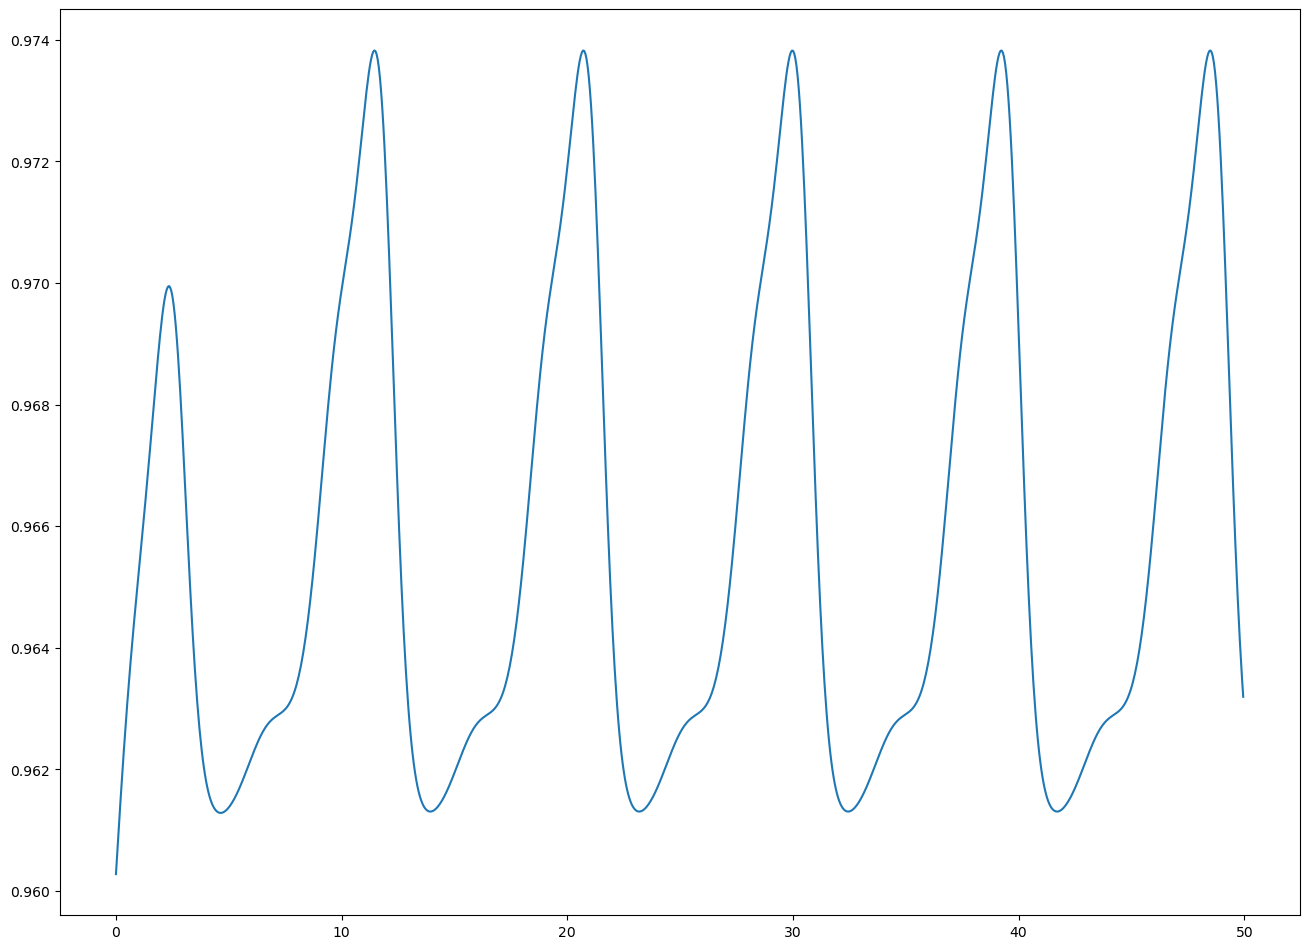

In [38]:
x0=[1.5,1.5]
k=0.01#1#8.7

alpha =1
beta =0.5
gamma = 0.5
delta = 0.5
x0 = [2,2]
k = 5

def lk2(u, h, h0):
    def f(x1, x2):
        hc = h(x1, x2)
        u1, u2 = u(x1, x2)
        return np.array([x1*(alpha-beta*x2)-u1*(hc-h0),-x2*(gamma-delta*x1)-u2*(hc-h0)])
    return f

# Si met le u, ne fonctionne pas !

u = lambda x1, x2 : k*np.array([delta-gamma/x1, beta-alpha/x2])

#u = lambda z1, z2 : [-k*(delta-gamma/z1),-k*(beta-alpha/z2)]


plt.figure()
t, x = solve_euler_implicit((lambda tps, xt : lk2(u, h,     h(*x0))(xt[0], xt[1])),     x0, 0.05, 0, 50, 10)#0.01, 0.0, 50, 10) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1]), label=f"{point_eq()}"); #h pas du tout constante
plt.legend()

plt.figure()
t, x = solve_euler_explicit((lambda tps, xt : lk2(u, h,     h(*x0))(xt[0], xt[1])),     x0, 0.05, 0, 50)#x0, 0.01, 0.0, 50) # point fixe
plt.plot(t, x);
plt.figure()
x=np.array(x)
plt.plot(t, h(x[:,0], x[:,1])); #h pas du tout constante


Q7 : Cauchy-Lipschitz, car fonctionne pour le h = H0, donc par unicité de la solution c'est la bonne
Q10 : minorer C à l'aide de considérations sur x1 et x2, et utiliser la constante C pour faire les calculs... (redemander à marius au besoin), inégalité & intégration

Tracer les différentes solutions sur le même graphe et comparer pour voir l'ordre
Tracer les portraits de phase des solutions pour la question 10